In [1]:
%matplotlib inline
import statsmodels.api as sms
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

interactive(children=(IntSlider(value=3, description='number_groups', max=10, min=1), Output()), _dom_classes=…

Button(description='Plot', style=ButtonStyle())

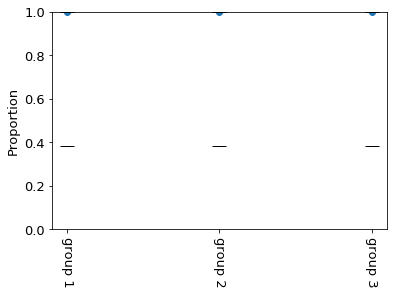

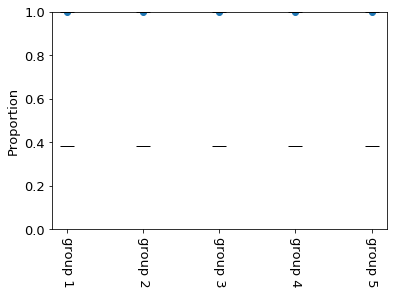

In [18]:
sliderNs = []
sliderys = []
number_gropus = widgets.IntSlider(min=1, max=10, value=5, style={'description_width':'auto'})
@widgets.interact(number_groups=(1, 10))
def f(number_groups=3):
    global sliderys, sliderNs
    sliderNs = [widgets.IntSlider(min=1, max=100, step=1, description=f'N{i}:', value=3) for i in range(1, number_groups+1)]
    sliderys = [widgets.IntSlider(min=0, max=100, step=1, description=f'successes {i}:', value=3) for i in range(1, number_groups+1)]
    display(widgets.HBox(children=[widgets.VBox(children=sliderNs), widgets.VBox(children=sliderys)]))

def plot2(b=None, ax=None):
    ns = np.array([s.value for s in sliderNs])
    ys = np.array([s.value for s in sliderys])
    #print(ns, ys)
    cis = []
    for i,(y, n) in enumerate(zip(ys, ns)):
        if y>n:
            print(f'error, y{i+1} must be <= N{i+1}')
            return
    cis = sms.stats.proportion_confint(ys, ns, alpha=0.05, method='agresti_coull')
    groups = [f'group {i}' for i in range(1, 1+len(sliderNs))]
    ax.plot(groups, ys/ns, 'o')
    ax.plot(groups, cis[0], '_k', markersize=14)
    ax.plot(groups, cis[1], '_k', markersize=14)
    ax.set_ylabel('Proportion', fontsize=13)
    ax.set_ylim([0, 1])

btn = widgets.Button(description='Plot')
display(btn)
@btn.on_click
def plot_on_click(b):
    ax = plt.gca()
    plot2(b=b, ax=ax)
    plt.xticks(fontsize=13, rotation=-90)
    plt.yticks(fontsize=13)